# Analysis of the Wind Speed across the Ireland.

![wind](./Wind.jpg)

## Project Description

This project is to analyse historical weather data across Ireland, focusing on wind speed. Historical data from the Met Éireann was used.

## Import of necessary libraries

In [207]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


## Datasets - tidy up

All datasets are stored in the `dataset` folder and split into two separate subfolders, depending on how many columns each database has and how many rows need to be skipped. The    `rows_17` subfolder contains the data sets of the meteorological observatories in Ireland in which a correction needs to be made to omit the first 17 rows. Similarly, in the `rows_23` subfolder, a correction needs to be made to skip the first 23 lines.

In [208]:
# adding a new column "place" representing the location of the meteorological observatory and skipping the first 17 rows
Mace_Head = pd.read_csv('./dataset/rows_17/hly275_Mace_Head.csv', skiprows=17)
Mace_Head['place'] = 'Mace Head'

Oak_Park = pd.read_csv('./dataset/rows_17/hly375_Oak_Park.csv', skiprows=17)
Oak_Park['place'] = 'Oak Park'

Moore_Park = pd.read_csv('./dataset/rows_17/hly575_Moore_Park.csv', skiprows=17, skipinitialspace=True)
Moore_Park['place'] = 'Moore Park'

Ballyhaise = pd.read_csv('./dataset/rows_17/hly675_Ballyhaise.csv', skiprows=17,skipinitialspace=True)
Ballyhaise['place'] = 'Ballyhaise'

Sherkin_Island = pd.read_csv('./dataset/rows_17/hly775_Sherkin_Island.csv', skiprows=17, skipinitialspace=True)
Sherkin_Island ['place'] = 'Sherkin Island'

Mullingar = pd.read_csv('./dataset/rows_17/hly875_Mullingar.csv', skiprows=17, skipinitialspace=True)
Mullingar ['place'] = 'Mullingar'

Newport = pd.read_csv('./dataset/rows_17/hly1175_Newport.csv', skiprows=17, skipinitialspace=True)
Newport ['place'] = 'Newport'

Gurteen = pd.read_csv('./dataset/rows_17/hly1475_Gurteen.csv', skiprows=17, skipinitialspace=True)
Gurteen ['place'] = 'Gurteen'

Athenry = pd.read_csv('./dataset/rows_17/hly1875_Athenry.csv', skiprows=17, skipinitialspace=True)
Athenry ['place'] = 'Athenry'

Finner = pd.read_csv('./dataset/rows_17/hly2075_Finner.csv', skiprows=17, skipinitialspace=True)
Finner ['place'] = 'Finner'

Claremorris = pd.read_csv('./dataset/rows_17/hly2175_Claremorris.csv', skiprows=17, skipinitialspace=True)
Claremorris ['place'] = 'Claremorris'

C:\Users\siklo\AppData\Local\Temp\ipykernel_9584\3235096644.py:2: DtypeWarning: Columns (2,4,6,7,8,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Mace_Head = pd.read_csv('./dataset/rows_17/hly275_Mace_Head.csv', skiprows=17)
C:\Users\siklo\AppData\Local\Temp\ipykernel_9584\3235096644.py:5: DtypeWarning: Columns (2,4,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Oak_Park = pd.read_csv('./dataset/rows_17/hly375_Oak_Park.csv', skiprows=17)


In [209]:
# combine datasets together with the concat() method
df_17 = pd.concat([Mace_Head, Oak_Park, Moore_Park, Ballyhaise, Sherkin_Island, Mullingar, Newport, Gurteen, Athenry, Finner, Claremorris], ignore_index=True)
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715582 entries, 0 to 2715581
Data columns (total 16 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   ind     int64 
 2   rain    object
 3   ind.1   int64 
 4   temp    object
 5   ind.2   int64 
 6   wetb    object
 7   dewpt   object
 8   vappr   object
 9   rhum    object
 10  msl     object
 11  ind.3   int64 
 12  wdsp    object
 13  ind.4   int64 
 14  wddir   object
 15  place   object
dtypes: int64(5), object(11)
memory usage: 331.5+ MB


I repeat the same procedure on csv files, where I need to skip 23 lines.

In [210]:
# adding a new column "place" representing the location of the meteorological observatory and skipping the first 23 
Shannon_Airport = pd.read_csv('./dataset/rows_23/hly518_Shannon_Airport.csv', skiprows=23, skipinitialspace=True)
Shannon_Airport['place'] = 'Shannon Airport'

Dublin_Airport = pd.read_csv('./dataset/rows_23/hly532_Dublin _Airport.csv', skiprows=23, skipinitialspace=True)
Dublin_Airport['place'] = 'Dublin Airport'

Belmullet = pd.read_csv('./dataset/rows_23/hly2375_Belmullet.csv', skiprows=23, skipinitialspace=True)
Belmullet['place'] = 'Belmullet'

Cork_Airport = pd.read_csv('./dataset/rows_23/hly3904_Cork_Airport.csv', skiprows=23, skipinitialspace=True)
Cork_Airport['place'] = 'Cork Airport'

Knock_Airport = pd.read_csv('./dataset/rows_23/hly4935_Knock_Airport.csv', skiprows=23, skipinitialspace=True)
Knock_Airport['place'] = 'Knock Airport'

In [211]:
#combine datasets together with the concat() method
df_23 = pd.concat([Shannon_Airport, Dublin_Airport, Belmullet, Cork_Airport, Knock_Airport], ignore_index=True)
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801837 entries, 0 to 2801836
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   ind     int64  
 2   rain    float64
 3   ind.1   int64  
 4   temp    float64
 5   ind.2   int64  
 6   wetb    float64
 7   dewpt   float64
 8   vappr   float64
 9   rhum    float64
 10  msl     float64
 11  ind.3   int64  
 12  wdsp    float64
 13  ind.4   int64  
 14  wddir   float64
 15  ww      float64
 16  w       float64
 17  sun     float64
 18  vis     float64
 19  clht    float64
 20  clamt   float64
 21  place   object 
dtypes: float64(15), int64(5), object(2)
memory usage: 470.3+ MB


Referece: [concat()](https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e)

In [212]:
# showing the columns
df_17.columns

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'place'],
      dtype='object')

In [213]:
# showing the columns
df_23.columns

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'place'],
      dtype='object')

There are several columns in both databases that I will not use for analysis purposes. The list above shows that a database named `df_23` has more columns than `df_17`. 
The columns that are the same in both databases are: **ind, ind.1, ind.2, ind.3, ind.4** and I will remove them completely. In order to merge both databases, I want 
to remove additional columns from the `df_23` named: **ww, w, sun, vis, clht, clamt**.

In [214]:
# removing columns from database df_17 and checking if the columns were removed

df_17 = df_17.drop(columns=['ind','ind.1', 'ind.2', 'ind.3', 'ind.4'])
df_17.columns

Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp',
       'wddir', 'place'],
      dtype='object')

In [215]:
# removing columns from database df_23 and checking if the columns were removed

df_23 = df_23.drop(columns=['ind','ind.1', 'ind.2', 'ind.3', 'ind.4', 'sun', 'vis', 'clht', 'clamt', 'ww', 'w'])
df_23.columns

Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp',
       'wddir', 'place'],
      dtype='object')

After sorting the columns of each database, I have to merge them.

In [216]:
df_all = pd.concat([df_17, df_23], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517419 entries, 0 to 5517418
Data columns (total 11 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   rain    object
 2   temp    object
 3   wetb    object
 4   dewpt   object
 5   vappr   object
 6   rhum    object
 7   msl     object
 8   wdsp    object
 9   wddir   object
 10  place   object
dtypes: object(11)
memory usage: 463.0+ MB


In [217]:
# I need to convert the date column to the datetime.
df_all['date'] = pd.to_datetime(df_all['date'], format='%d-%b-%Y %H:%M', errors='coerce')
print(df_all[['date', 'place', 'wdsp']])

                       date          place  wdsp
0       2003-08-13 01:00:00      Mace Head      
1       2003-08-13 02:00:00      Mace Head      
2       2003-08-13 03:00:00      Mace Head      
3       2003-08-13 04:00:00      Mace Head      
4       2003-08-13 05:00:00      Mace Head      
...                     ...            ...   ...
5517414 2024-11-30 20:00:00  Knock Airport  17.0
5517415 2024-11-30 21:00:00  Knock Airport  16.0
5517416 2024-11-30 22:00:00  Knock Airport  15.0
5517417 2024-11-30 23:00:00  Knock Airport  14.0
5517418 2024-12-01 00:00:00  Knock Airport  12.0

[5517419 rows x 3 columns]


Reference: [Convert to datetime](https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/)

In [218]:
# I want to extract the month and year and create separate columns
df_all['month'] = df_all['date'].dt.month
df_all['year'] = df_all['date'].dt.year
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517419 entries, 0 to 5517418
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   rain    object        
 2   temp    object        
 3   wetb    object        
 4   dewpt   object        
 5   vappr   object        
 6   rhum    object        
 7   msl     object        
 8   wdsp    object        
 9   wddir   object        
 10  place   object        
 11  month   int32         
 12  year    int32         
dtypes: datetime64[ns](1), int32(2), object(10)
memory usage: 505.1+ MB


In [219]:
# I want to convert the wind peed from knot to kilomenters per hour. As the 'wdsp' is object type column I need to convert it to the float first.
df_all['wdsp'] = pd.to_numeric(df_all['wdsp'], errors='coerce')

# now I can convert the knot to kilometer per hour
df_all['wdsp'] = df_all['wdsp'] * 1.852
print(df_all[['date', 'place', 'wdsp']])

                       date          place    wdsp
0       2003-08-13 01:00:00      Mace Head     NaN
1       2003-08-13 02:00:00      Mace Head     NaN
2       2003-08-13 03:00:00      Mace Head     NaN
3       2003-08-13 04:00:00      Mace Head     NaN
4       2003-08-13 05:00:00      Mace Head     NaN
...                     ...            ...     ...
5517414 2024-11-30 20:00:00  Knock Airport  31.484
5517415 2024-11-30 21:00:00  Knock Airport  29.632
5517416 2024-11-30 22:00:00  Knock Airport  27.780
5517417 2024-11-30 23:00:00  Knock Airport  25.928
5517418 2024-12-01 00:00:00  Knock Airport  22.224

[5517419 rows x 3 columns]


Reference: [Convert knots to km/h](https://www.inchcalculator.com/convert/knot-to-kilometer-per-hour/#:~:text=To%20con852%20kilometers%20per%20hour%2Fknot.&text=The%20speed%20in%20kilometers%20per,in%20knots%20multiplied%20by%201.852.)

In [220]:
# I want to convert another columns to the numeric type as well
convert_columns = ['rain','temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wddir']
for columns in convert_columns:
    df_all[columns] = pd.to_numeric(df_all[columns], errors='coerce')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517419 entries, 0 to 5517418
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   rain    float64       
 2   temp    float64       
 3   wetb    float64       
 4   dewpt   float64       
 5   vappr   float64       
 6   rhum    float64       
 7   msl     float64       
 8   wdsp    float64       
 9   wddir   float64       
 10  place   object        
 11  month   int32         
 12  year    int32         
dtypes: datetime64[ns](1), float64(9), int32(2), object(1)
memory usage: 505.1+ MB


I decided to use data only from 2000 year up till now.

In [221]:
# filter data between 2000 and 2024
start_date = '2000-01-01'
end_date = '2024-12-31'
df_filtered = df_all[(df_all['date'] >= start_date) & (df_all['date'] <= end_date)]


I need to check the blank/whitespaces and if there are any replace them with NaN and removed them.

In [222]:
# function to check for blank or whitespaces in the dataset
def blank(x):
    return isinstance(x, str) and (x.strip() == '')

# runing and checking amount of the blank or whitespaces
blank_count = df_filtered.applymap(blank).sum().sum()
print(f'Total blank or whitespaces: {blank_count}')

Total blank or whitespaces: 0


In [223]:
# checking the total number of NaN
nan_count = df_filtered.isna().sum().sum()
print(f'Total NaN: {nan_count}')

Total NaN: 477115


Reference: 
- [isinstance()](https://www.geeksforgeeks.org/python-isinstance-method/)
- [strip()](https://www.toppr.com/guides/python-guide/references/methods-and-functions/methods/string/strip/python-string-strip/#:~:text=Python%20strip()%20function%20is%20used%20to%20remove%20extra%20whitespaces,removed%20from%20the%20original%20string.)
- [applymap()](https://sparkbyexamples.com/pandas/pandas-apply-map/)
- [isna()](https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/)

In [224]:
# replacing blank / whitespaces with NaN
df_filtered.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# dropping the rows with any NaN values
df_filtered.dropna(inplace=True)
print(df_filtered)

C:\Users\siklo\AppData\Local\Temp\ipykernel_9584\3966798545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace(r'^\s*$', np.nan, regex=True, inplace=True)


                       date  rain  temp  wetb  dewpt  vappr   rhum     msl  \
24      2003-08-14 01:00:00   0.0  10.9   9.9    8.9   11.4   87.0  1024.2   
25      2003-08-14 02:00:00   0.0  10.7   9.6    8.5   11.1   86.0  1024.0   
26      2003-08-14 03:00:00   0.0  10.2   9.1    8.0   10.7   86.0  1024.0   
27      2003-08-14 04:00:00   0.0   9.5   8.7    7.9   10.7   90.0  1023.8   
28      2003-08-14 05:00:00   0.0   9.2   8.6    8.0   10.7   92.0  1023.7   
...                     ...   ...   ...   ...    ...    ...    ...     ...   
5517414 2024-11-30 20:00:00   0.0  11.6  10.9   10.3   12.5   91.0  1004.3   
5517415 2024-11-30 21:00:00   0.0  11.4  10.7   10.0   12.3   91.0  1004.6   
5517416 2024-11-30 22:00:00   0.0  10.9  10.3    9.7   12.0   92.0  1005.0   
5517417 2024-11-30 23:00:00   0.0  10.8  10.3    9.9   12.1   94.0  1004.8   
5517418 2024-12-01 00:00:00   0.8   0.0   0.0    0.0    6.1  100.0  1005.0   

           wdsp  wddir          place  month  year  
24       1

C:\Users\siklo\AppData\Local\Temp\ipykernel_9584\3966798545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Reference:  [Replacing blank values, white space with NaN](https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/)

In [225]:
# checking for any remaining blank or whitespaces
remaining_blanks = df_filtered.applymap(blank).sum().sum()
print(f'Remaining blank or whitespaces: {remaining_blanks}')

# checking the total number of NaN
nan_count = df_filtered.isna().sum().sum()
print(f'Total NaN: {nan_count}')


Remaining blank or whitespaces: 0
Total NaN: 0


## Data Analysis

Once I've cleaned up the dataset and set a period for further analysis, I can start exploring the data. I used the `info()` function to display general information about the dataset (number of columns and rows and data types).

In [226]:
# general information of cleaned dataset
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3017270 entries, 24 to 5517418
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   rain    float64       
 2   temp    float64       
 3   wetb    float64       
 4   dewpt   float64       
 5   vappr   float64       
 6   rhum    float64       
 7   msl     float64       
 8   wdsp    float64       
 9   wddir   float64       
 10  place   object        
 11  month   int32         
 12  year    int32         
dtypes: datetime64[ns](1), float64(9), int32(2), object(1)
memory usage: 299.3+ MB


In [227]:
df_filtered.loc[:,'wdsp']

24         11.112
25          7.408
26          5.556
27          9.260
28         11.112
            ...  
5517414    31.484
5517415    29.632
5517416    27.780
5517417    25.928
5517418    22.224
Name: wdsp, Length: 3017270, dtype: float64

I want to see if there is any correlation between the different variables.

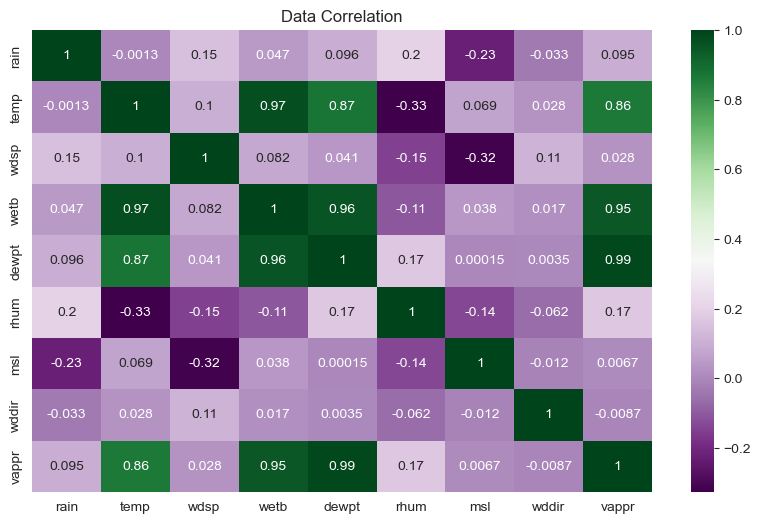

In [228]:
df_corr = df_filtered[['rain','temp','wdsp','wetb','dewpt','rhum','msl','wddir','vappr']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap='PRGn')
plt.title('Data Correlation')
plt.show()

As per above it doesn't look like there is any relationship between the wind speed and other variables.

### Average wind speed for the selected period

In the next step, I group the observatory stations according to their location, resample by month, and calculate the average wind speed for each station. The result will be displayed as a separate graph for each station for the period from 2000 to the present.

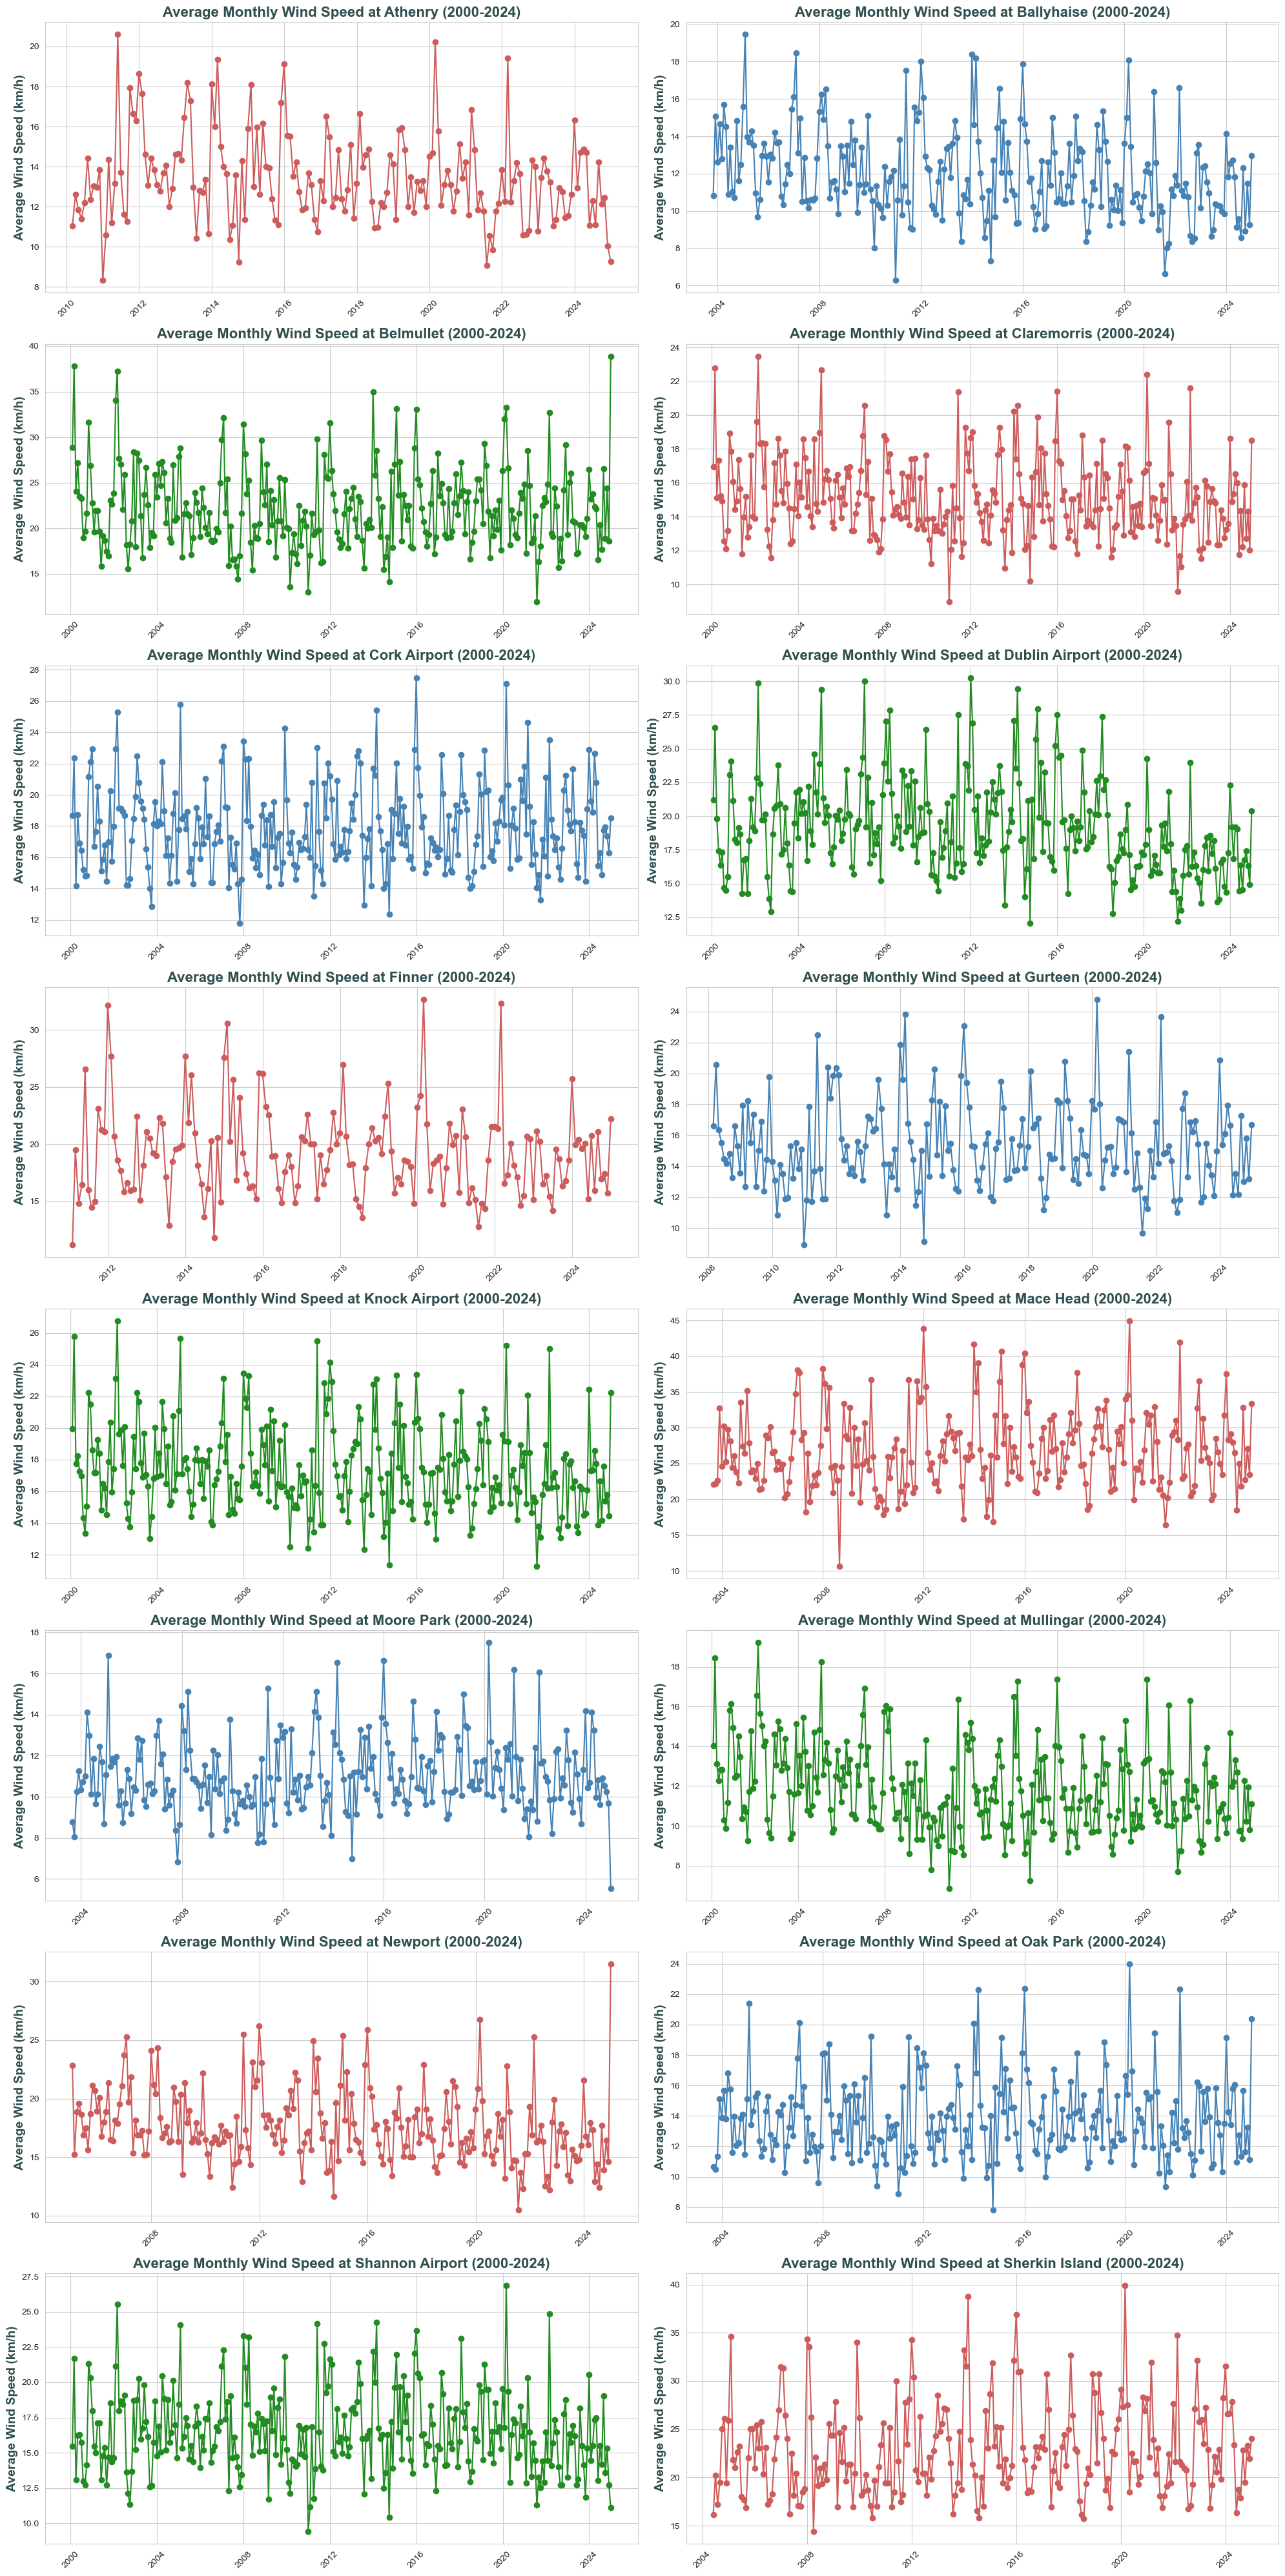

In [229]:
df_filtered.set_index('date', inplace=True)

# resample data monthly and calculate the mean wind speed for each observatory
df_monthly_wdsp = df_filtered.groupby('place').resample('M')['wdsp'].mean().reset_index()

# get unique observatory locations
observatories = df_monthly_wdsp['place'].unique()

# determine the number of subplots needed, number of columns = 2, number of rows are calculated
num_obs = len(observatories)
cols = 2  
rows = (num_obs + cols - 1) // cols  

col = ['indianred','steelblue','forestgreen']

# create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  # flatten the array of axes for easy iteration

# plot data for each observatory
for i, obs in enumerate(observatories):
    
    df_obs = df_monthly_wdsp[df_monthly_wdsp['place'] == obs]
    axes[i].plot(df_obs['date'], df_obs['wdsp'], marker='o', linestyle='-', color = col[i%3])
    axes[i].set_title(f'Average Monthly Wind Speed at {obs} (2000-2024)', color ='darkslategray', fontsize = 16, fontweight='bold')
    axes[i].set_xlabel('', color ='darkslategray', fontsize = 14, fontweight='bold')
    axes[i].set_ylabel('Average Wind Speed (km/h)', color ='darkslategray', fontsize = 14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


#### Analysis of results

In the 18th century Francis Beaufort succeeded to standardising a scale which is still used today. The **Beaufort Wind Scale** is used to estimate the wind strengths at sea or land. Over the years, the scale has changed, but all versions are based on the same premise that wind speed can be estimated by observing how the wind affects the objects around us.

![Beaufort Wind Scale](./Beaufort_Wind_Scale.jpeg)

Reference: [Beaufort Wind Scale](https://www.science-sparks.com/what-is-the-beaufort-scale/)

**Highest wind speed:**<br>
The highest wind speed readings can be seen at Mace Head, Sherkin Island, and Belmullet for the period listed. All of these sites are coastal baselines and are most likely to be exposed to stronger winds throughout the year compared to areas in the center of the country.

**Lowest wind speed:**<br>
The lowest wind speed readings can be seen at stations such as Oak Park, Moore Park, Mullingar and Ballyhaise. This is due to the fact that these sites are located inland and therefore are not exposed to strong winds like coastal sites.

**Overal wind speed:**<br>
The overall wind speed in the country showed relative stability at the largest site with periodic fluctuations during the observed period. Typical wind speeds will be between approximately 10 km/h and 30 km/h, depending on the geographical location of the meteorological observatory from which the data was collected.

### Average wind speed per season

In [230]:
# define a function for each season based on the month
def season(month):
    if month in [11,12,1]:
        return 'winter'
    elif month in [2,3,4]:
        return 'spring'
    elif month in [5,6,7]:
        return 'summer'
    elif month in [8,9,10]:
        return 'autum'
    

C:\Users\siklo\AppData\Local\Temp\ipykernel_9584\3164121082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['season'] = df_filtered['month'].apply(season)


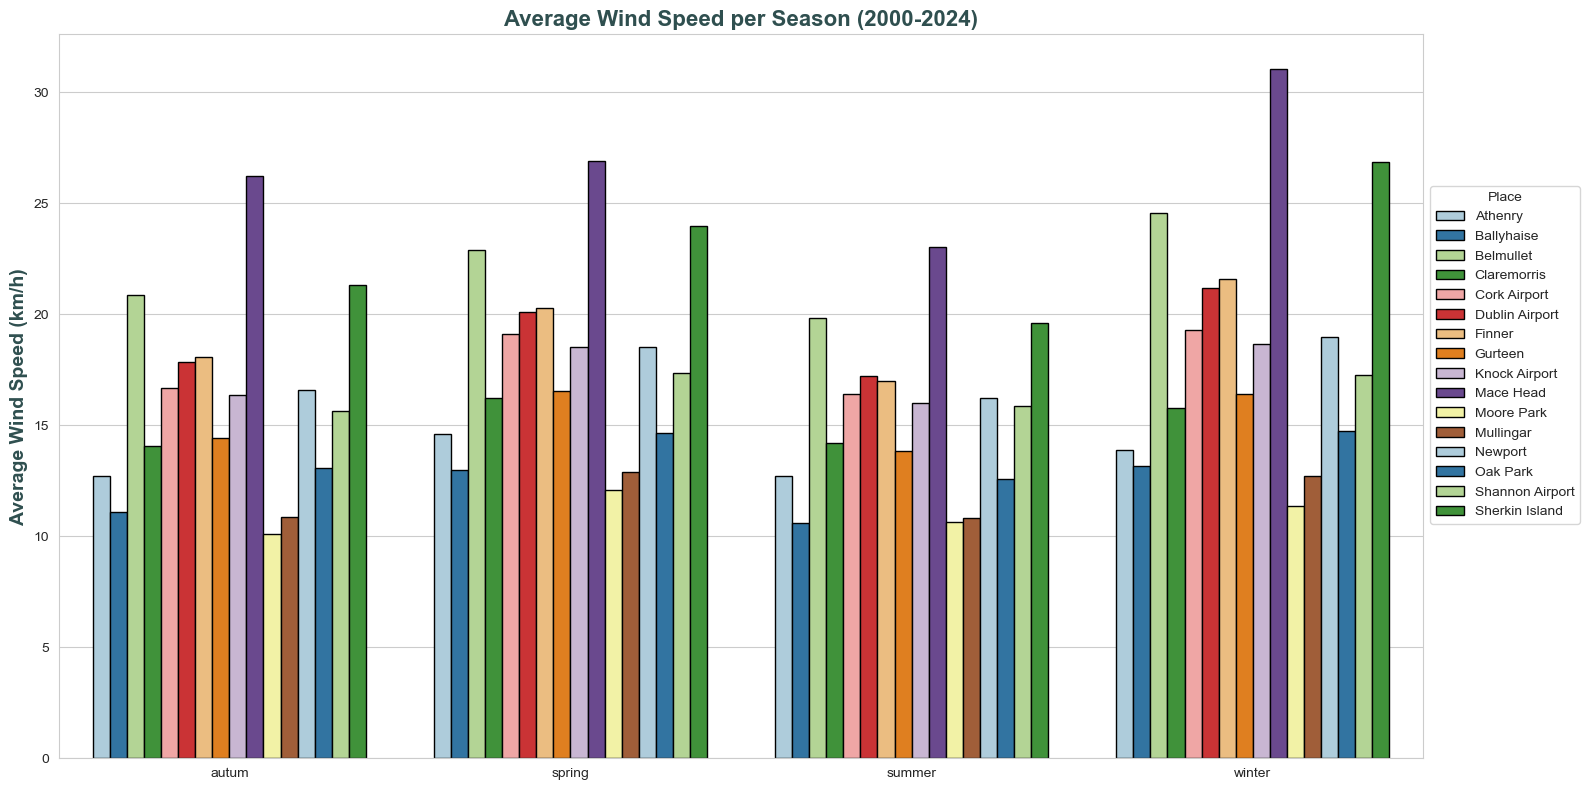

In [231]:
# add 'season' column to dataset
df_filtered['season'] = df_filtered['month'].apply(season)

# resample data monthly and calculate the mean wind speed for each observatory and season
df_wdsp_season = df_filtered.groupby(['place','season'])['wdsp'].mean(). reset_index()

# set the style for the plots
sns.set_style('whitegrid')

# plot the data
plt.figure(figsize=(16, 8))
sns.barplot(data=df_wdsp_season, x='season', y='wdsp', hue='place', palette='Paired', edgecolor= 'black')  
plt.title('Average Wind Speed per Season (2000-2024)', color='darkslategray', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Average Wind Speed (km/h)', color='darkslategray',fontsize = 14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 0.8), loc='upper left', title='Place')
plt.tight_layout()
plt.show()


#### Analysis of results

The graph above shows the total wind speed at different locations throughout the seasons. Obviously, the strongest winds can be observed during the winter season, followed by autumn and spring. The lowest wind speed is in summer.

The breakdown for each location is below.

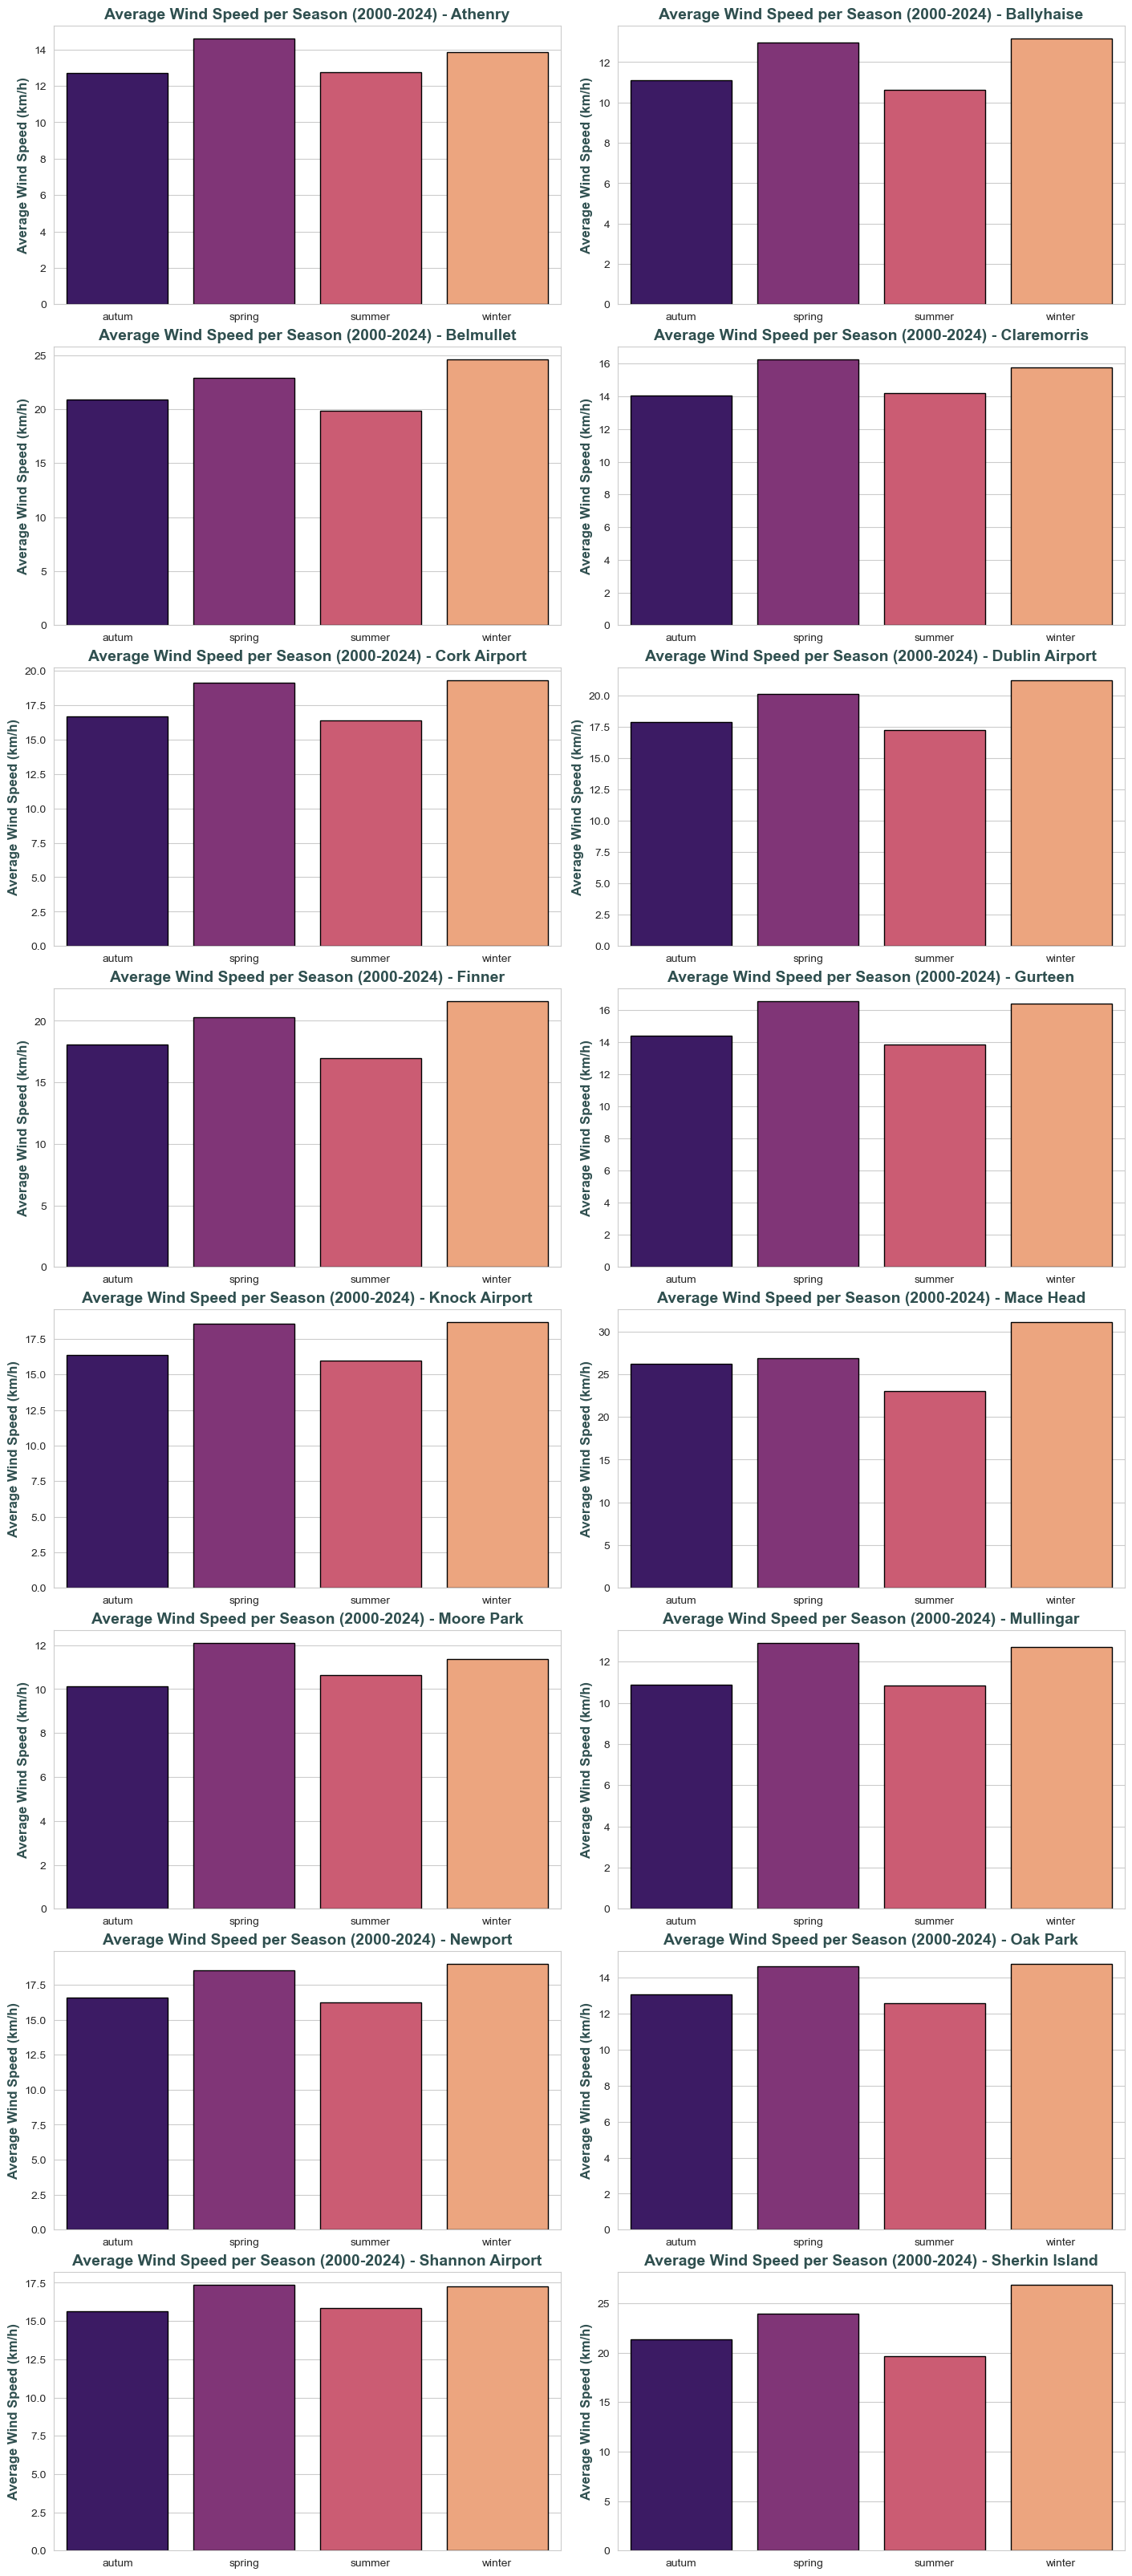

In [232]:
# set the style and palette for the plots
sns.set_style('whitegrid')
palette = sns.color_palette('magma', n_colors=len(df_wdsp_season['season'].unique()))

# get the list of unique observatory locations
observatories = df_wdsp_season['place'].unique()
num_observatories = len(observatories)

# determine the layout for subplots and calculate the number of the rows
cols = 2
rows = (num_observatories + cols - 1) // cols  # Calculate the number of rows needed

# create a figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), constrained_layout=True)
axes = axes.flatten()  

# iterate over each observatory
for i, (obs, ax) in enumerate(zip(observatories, axes)):
    df_obs = df_wdsp_season[df_wdsp_season['place'] == obs]
    
    # create a bar plot for the current observatory
    sns.barplot(data=df_obs, x='season', y='wdsp', palette=palette, edgecolor='black', ax=ax)
    # set the title and labels
    ax.set_title(f'Average Wind Speed per Season (2000-2024) - {obs}', color='darkslategray', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Average Wind Speed (km/h)', color='darkslategray', fontsize=12, fontweight='bold')
    
plt.show()

### Average rainfall per season

I want to see which place in Ireland is the wettest place with the highest rainfall since 2000 per season.

In [233]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3017270 entries, 2003-08-14 01:00:00 to 2024-12-01 00:00:00
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   rain    float64
 1   temp    float64
 2   wetb    float64
 3   dewpt   float64
 4   vappr   float64
 5   rhum    float64
 6   msl     float64
 7   wdsp    float64
 8   wddir   float64
 9   place   object 
 10  month   int32  
 11  year    int32  
 12  season  object 
dtypes: float64(9), int32(2), object(2)
memory usage: 299.3+ MB


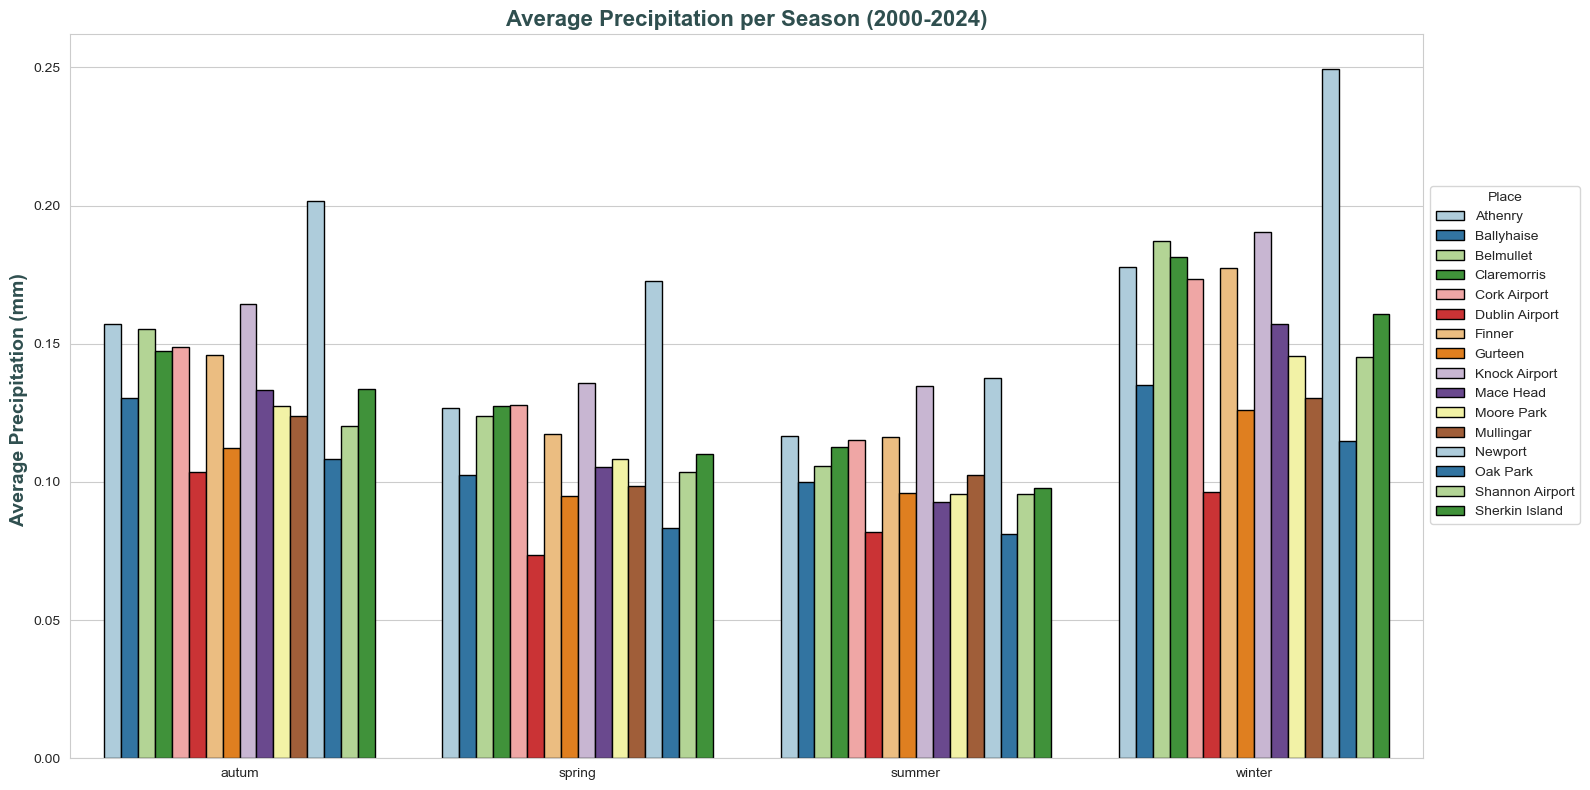

In [234]:
# resample data monthly and calculate the mean rainfall for each observatory and season
df_rain_season = df_filtered.groupby(['place','season'])['rain'].mean(). reset_index()

# set the style for the plots
sns.set_style('whitegrid')

# plot the data
plt.figure(figsize=(16, 8))
sns.barplot(data=df_rain_season, x='season', y='rain', hue='place', palette='Paired', edgecolor= 'black')  
plt.title('Average Precipitation per Season (2000-2024)', color='darkslategray', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Average Precipitation (mm) ', color='darkslategray',fontsize = 14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 0.8), loc='upper left', title='Place')
plt.tight_layout()
plt.show()


#### Analysis of results

The results show that the wettest place in Ireland is in Newport, Co Mayo. The difference in the amount of precipitation compared to other places is significantly higher throughout the year.

### Average temperature per season

I want to see which place in Ireland is the hottest place with the highest temperature since 2000 per season.

In [235]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3017270 entries, 2003-08-14 01:00:00 to 2024-12-01 00:00:00
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   rain    float64
 1   temp    float64
 2   wetb    float64
 3   dewpt   float64
 4   vappr   float64
 5   rhum    float64
 6   msl     float64
 7   wdsp    float64
 8   wddir   float64
 9   place   object 
 10  month   int32  
 11  year    int32  
 12  season  object 
dtypes: float64(9), int32(2), object(2)
memory usage: 299.3+ MB


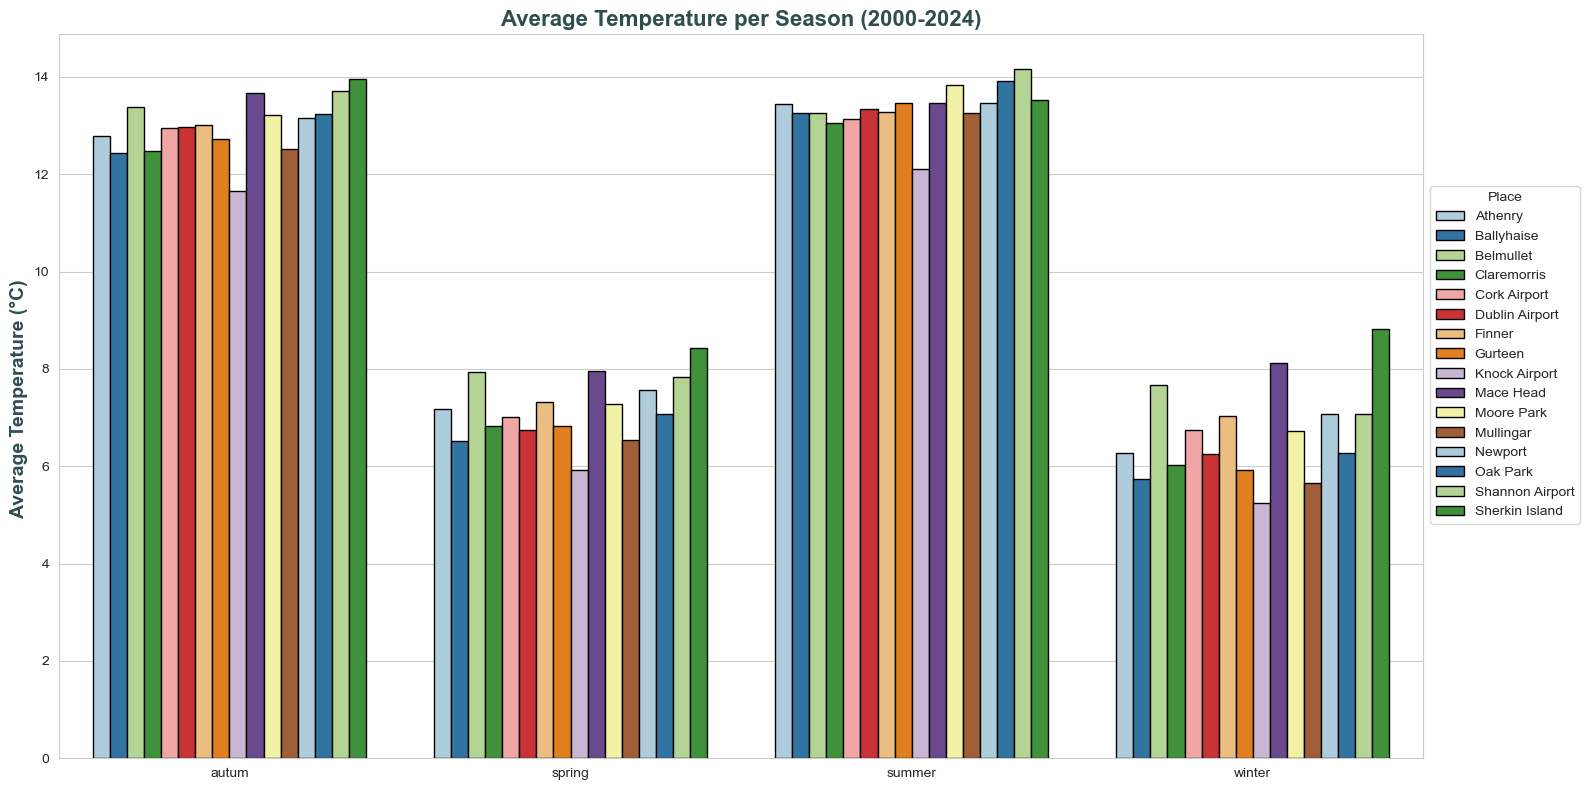

In [236]:
# resample data monthly and calculate the mean rainfall for each observatory and season
df_temp_season = df_filtered.groupby(['place','season'])['temp'].mean(). reset_index()

# set the style for the plots
sns.set_style('whitegrid')

# plot the data
plt.figure(figsize=(16, 8))
sns.barplot(data=df_temp_season, x='season', y='temp', hue='place', palette='Paired', edgecolor= 'black')  
plt.title('Average Temperature per Season (2000-2024)', color='darkslategray', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Average Temperature (°C) ', color='darkslategray',fontsize = 14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 0.8), loc='upper left', title='Place')
plt.tight_layout()
plt.show()

#### Analysis of results

The hottest time in Ireland is Summer and Autum according to the above results. There is no significant difference between the inspected sites. The highest average temperature is around 14 °C.

### Wind Speed prediction

**ARIMA**

The ARIMA model is a very popular forecasting technique for time series in Python. It predict a given time series based on its own past values. ARIMA stands for Autoregressive (AR) Integrated (I) Moving Average (MA). It is very efficient and commonly used in economics, weather forecasting and capacity planning, and many other fields.

Before we start using the ARIMA model, we need to make sure that the data is stationary. To check this, it is necessary to perform the **Augmented Dickey-Fuller test**. If the `p-value`is less than 0.05, our data is stationary, otherwise we need to distinguish the data to make it stationary. The purpose of differencing is to eliminate any trends or seasonal structures.

The ARIMA model has parameters that can be defined as:
-	**p:** &nbsp;number of lag observations in the model, it is also known as the lag order
-	**d:** &nbsp;number of times the raw observations are differenced, this is known as the degree of differencing.
-	**q:** &nbsp;this is the size of the moving average window, it is also known as the order of the moving average

To find out what these parameters needs to be we can use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

Reference: [ARIMA](https://www.datacamp.com/tutorial/arima)

In [237]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

Originally, I tried to run the ARIMA module on the cleaned dataset `df_filtered`, but unfortunately it didn't work and I assume it's due to the size of the dataset. I had to interrupt the code manually. Therefore, I decided to use data only for Dublin Airport and for the period 2020-2024.

In [ ]:
# filter data between 2020 and 2024 from main dataframe
start_date = '2020-01-01'
end_date = '2024-12-31'
df_dublin = df_all[(df_all['date'] >= start_date) & (df_all['date'] <= end_date)]

# select only Dublin Airport and wind speed column
dublin = df_dublin[df_dublin['place'] == 'Dublin Airport']
dublin_wdsp = dublin[['wdsp', 'date']].copy()

# set up date as index
dublin_wdsp.set_index('date', inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


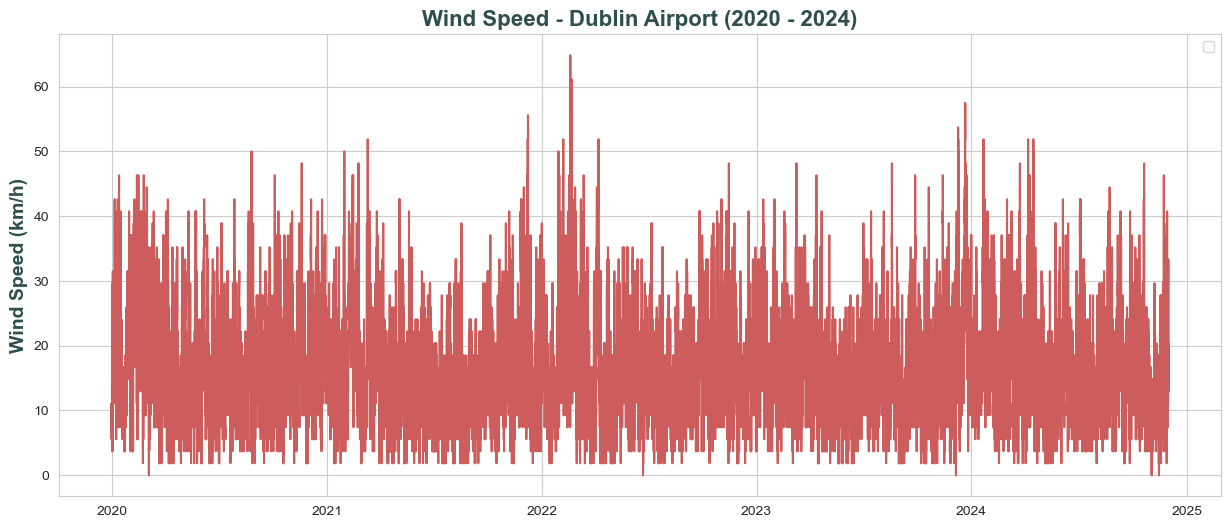

In [273]:
# plot the original data for Dublin Airport - wind speed
plt.figure(figsize=(15, 6))
plt.plot(dublin_wdsp.index, dublin_wdsp['wdsp'], color = 'indianred')
plt.xlabel('')
plt.ylabel('Wind Speed (km/h)',color='darkslategray', fontsize=14, fontweight='bold')
plt.title('Wind Speed - Dublin Airport (2020 - 2024)',color='darkslategray', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [262]:
# checking stationary, using Augmented Dickey-Fuller test
# if the p-value is grater than 0.05 the series is non-stationary and differencing may be necessary
# my data meets the criteria so there is no need to apply differencing

result = adfuller(dublin_wdsp['wdsp'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -20.797967130164732
p-value: 0.0


"\nfor key, wdsp in result[4].items():\n    print('Critical Value ({}) : {}'.format(key, wdsp))\n"

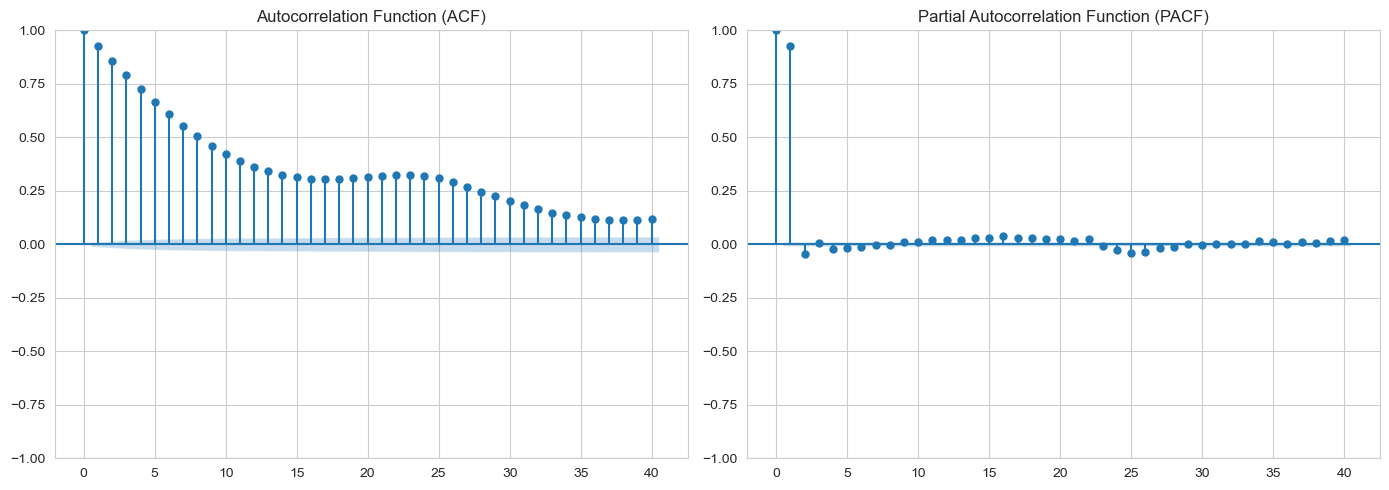

"\nplot_acf(dublin_wdsp['wdsp'], lags=40)\nplot_pacf(dublin_wdsp['wdsp'], lags=40)\nplt.show()\n"

In [ ]:
# plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
plot_acf(dublin_wdsp ['wdsp'], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(dublin_wdsp['wdsp'], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [264]:
model = ARIMA(dublin_wdsp['wdsp'], order=(1, 0, 1))
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=120)

c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


"\nplt.figure(figsize=(12, 6))\nplt.plot(dublin_wdsp['wdsp'], label='Historical')\nplt.plot(forecast, label='Forecast', color='red')\nplt.legend()\nplt.show()\n"

c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\siklo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


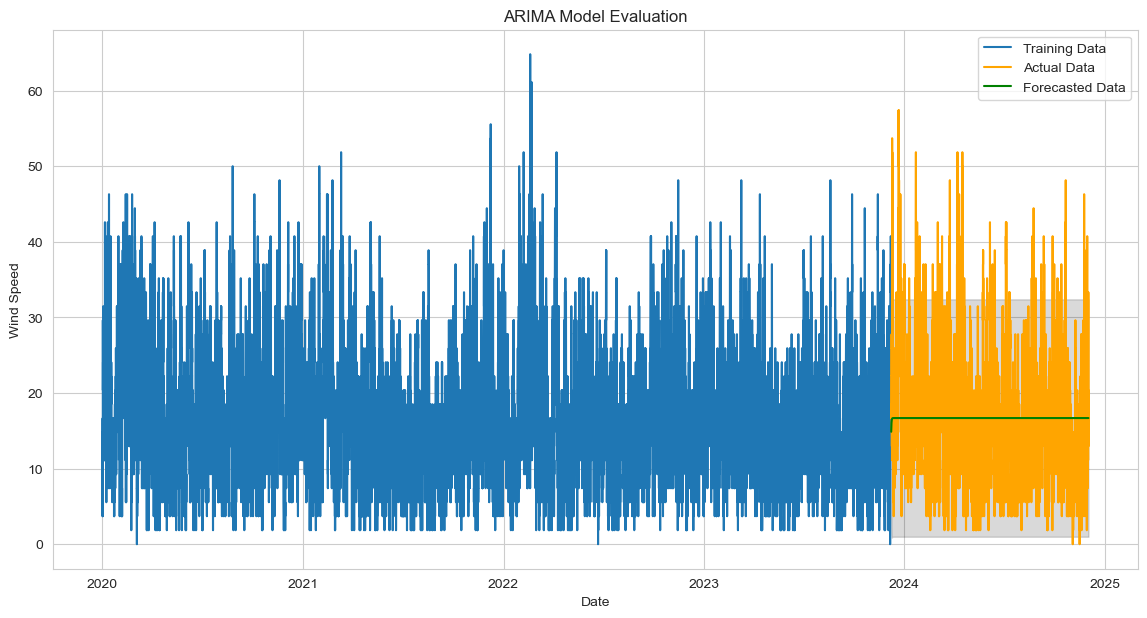

RMSE: 8.269391803903012


In [ ]:
# split the data into train and test
train_size = int(len(dublin_wdsp) * 0.8)
train, test = dublin_wdsp[0:train_size], dublin_wdsp[train_size:len(dublin_wdsp)]

# fit the ARIMA model on the training dataset
model_train = ARIMA(train['wdsp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# calculate the mean squared error
mse = mean_squared_error(test['wdsp'], test_forecast_series)
rmse = mse**0.5

# create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['wdsp'], label='Training Data')
plt.plot(test['wdsp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

print('RMSE:', rmse)

Reference:<br>
[ARIMA module](https://medium.com/datainc/time-series-analysis-and-forecasting-with-arima-in-python-aa22694b3aaa)<br>
[ARIMA forecasting](https://medium.com/analytics-vidhya/python-code-on-arima-forecasting-d6e2fd90697c)

### End
-----